In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from keras import preprocessing

from keras.models import Sequential

from keras.layers import Conv2D,Dropout,Dense,Flatten,Conv2DTranspose,BatchNormalization,LeakyReLU,Reshape,Input

import tensorflow as tf

import keras


In [3]:
np.random.seed(42)

tf.random.set_seed(42)

In [4]:
df_train = pd.read_csv('fashion-mnist_train.csv')

df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_train = df_train[df_train['label'] == 0]

df_train.shape

(6000, 785)

In [5]:
# df_test = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_test.csv')

# df_test.head()

In [6]:
# df = pd.concat([df_train, df_test], ignore_index=True)

# df

In [6]:
x = df_train.drop('label',axis=1)

x.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
10,0,0,0,0,1,0,0,0,0,41,...,164,177,163,0,0,1,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
24,0,0,0,0,0,0,0,0,40,122,...,125,93,87,49,0,0,0,0,0,0
31,0,0,0,0,0,0,0,0,0,2,...,154,118,66,0,0,0,0,0,0,0


In [7]:
x = x.values

x = x.reshape(-1,28,28,1)

x.shape

(6000, 28, 28, 1)

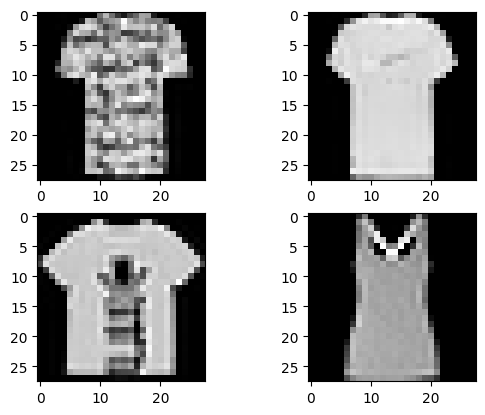

In [9]:
fig,axe=plt.subplots(2,2)

idx = 0

for i in range(2):

    for j in range(2):

        axe[i,j].imshow(x[idx].reshape(28,28),cmap='gray')

        idx+=1

In [8]:
x =  x.astype('float32')

x = x / 255.0

x = x*2 - 1.

In [19]:
batch_size = 32

codings_size = 100

epochs=10

In [13]:
GAN = keras.saving.load_model('gan.keras', custom_objects={'LeakyReLU': LeakyReLU})

GAN.trainable = True

GAN.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 28, 28, 1)      │       840,705 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 1)              │       212,865 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,734,214 (10.43 MB)

 Trainable params: 840,321 (3.21 MB)

 Non-trainable params: 213,249 (833.00 KB)

 Optimizer params: 1,680,644 (6.41 MB)

In [13]:
# GENERATOR

generator = Sequential([

    Input(shape= [codings_size]),

])

generator.add(Dense(7 * 7 * 128))

generator.add(Reshape([7, 7, 128]))

generator.add(BatchNormalization())

generator.add(Conv2DTranspose(64, kernel_size=5, strides=2, padding="same",

                                 activation="relu"))

generator.add(BatchNormalization())

generator.add(Conv2DTranspose(1, kernel_size=5, strides=2, padding="same",

                                 activation="tanh"))

In [14]:
discriminator = Sequential([

    Input(shape=[28, 28, 1]),

])

discriminator.add(Conv2D(64, kernel_size=5, strides=2, padding="same",

                        activation=LeakyReLU(0.3)))

discriminator.add(Dropout(0.5))

discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same",

                        activation=LeakyReLU(0.3)))

discriminator.add(Dropout(0.5))

discriminator.add(Flatten())

discriminator.add(Dense(1, activation="sigmoid"))

In [15]:
GAN = Sequential([generator, discriminator])

In [16]:
discriminator.compile(loss="binary_crossentropy", optimizer="adam")

discriminator.trainable = False

In [17]:
GAN.compile(loss="binary_crossentropy", optimizer="adam")

In [18]:
GAN.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 28, 28, 1)      │       840,705 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 1)              │       212,865 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,053,570 (4.02 MB)

 Trainable params: 840,321 (3.21 MB)

 Non-trainable params: 213,249 (833.00 KB)

In [19]:
GAN.layers[0].summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 6272)           │       633,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 14, 14, 64)     │       204,864 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 28, 28, 1)      │         1,601 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 840,705 (3.21 MB)

 Trainable params: 840,321 (3.21 MB)

 Non-trainable params: 384 (1.50 KB)

In [20]:
GAN.layers[1].summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 14, 14, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         6,273 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 212,865 (831.50 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 212,865 (831.50 KB)

In [11]:
dataset = tf.data.Dataset.from_tensor_slices(x).shuffle(buffer_size=1000)

dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [20]:
generator, discriminator = GAN.layers

for epoch in range(epochs):

    print(f"Currently on Epoch {epoch+1}")

    i = 0

    for X_batch in dataset:

        i=i+1

        if i%100 == 0:

            print(f"\tCurrently on batch number {i} of {len(x)//batch_size}")



        noise = tf.random.normal(shape=[batch_size, codings_size])



        gen_images = generator(noise)



        X_fake_vs_real = tf.concat([gen_images, tf.dtypes.cast(X_batch,tf.float32)], axis=0)



        y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)



        discriminator.trainable = True



        discriminator.train_on_batch(X_fake_vs_real, y1)



        noise = tf.random.normal(shape=[batch_size, codings_size])



        y2 = tf.constant([[1.]] * batch_size)



        discriminator.trainable = False



        GAN.train_on_batch(noise, y2)



print("TRAINING COMPLETE")

Currently on Epoch 1
	Currently on batch number 100 of 187
Currently on Epoch 2
	Currently on batch number 100 of 187
Currently on Epoch 3
	Currently on batch number 100 of 187
Currently on Epoch 4
	Currently on batch number 100 of 187
Currently on Epoch 5
	Currently on batch number 100 of 187
Currently on Epoch 6
	Currently on batch number 100 of 187
Currently on Epoch 7
	Currently on batch number 100 of 187
Currently on Epoch 8
	Currently on batch number 100 of 187
Currently on Epoch 9
	Currently on batch number 100 of 187
Currently on Epoch 10
	Currently on batch number 100 of 187
TRAINING COMPLETE


In [21]:
noise = tf.random.normal(shape=[10, codings_size])

images = generator(noise)

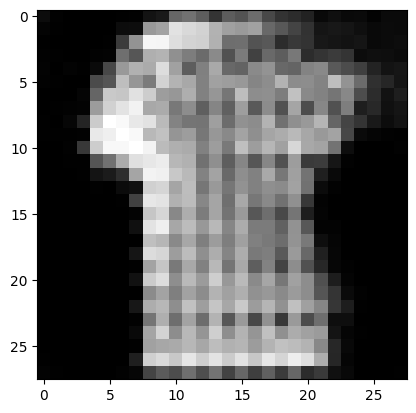

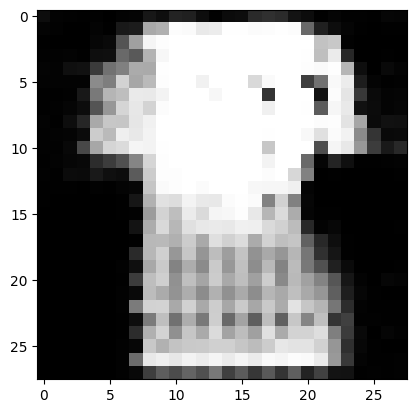

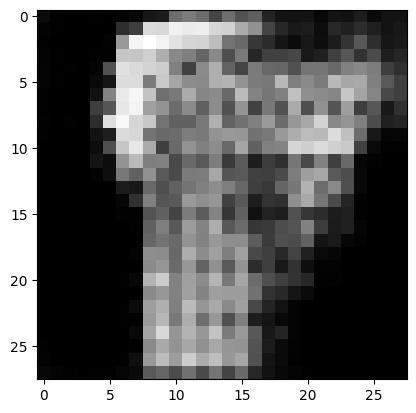

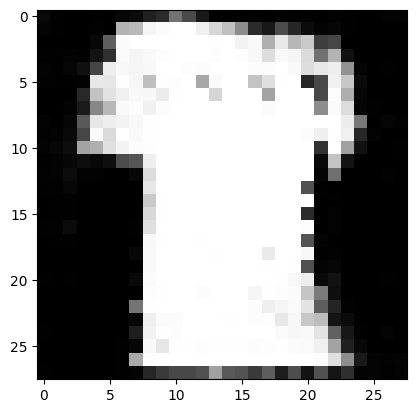

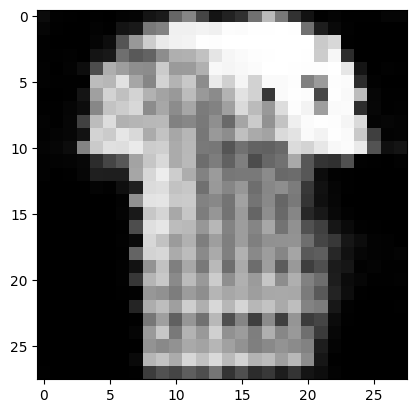

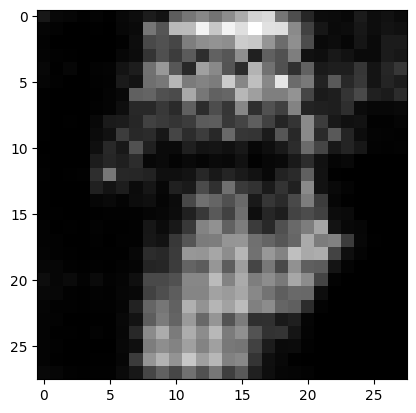

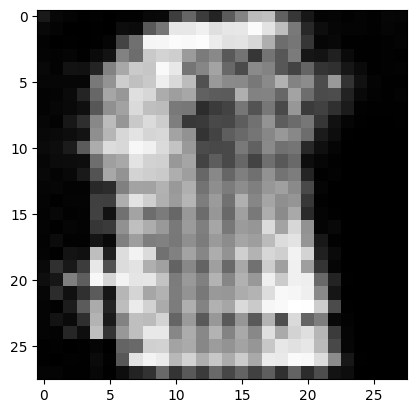

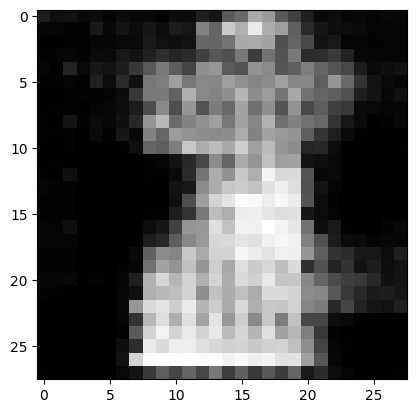

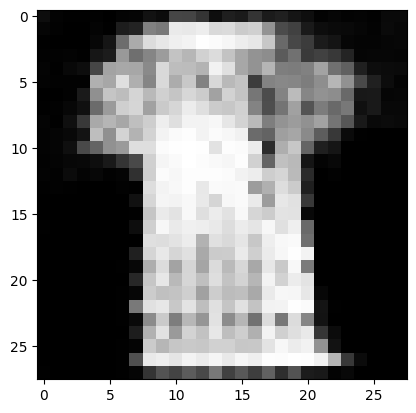

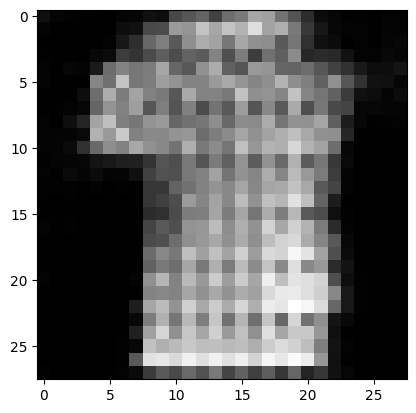

In [24]:
#Results after 10 epochs

for image in images:

    plt.imshow(image.numpy().reshape(28,28),cmap='gray')

    plt.show()

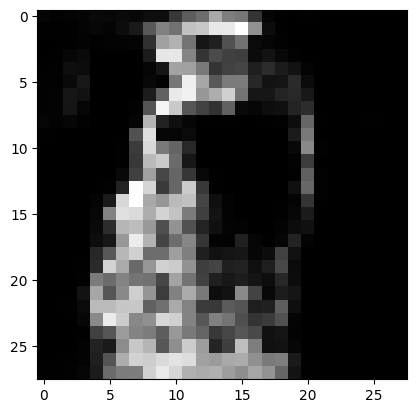

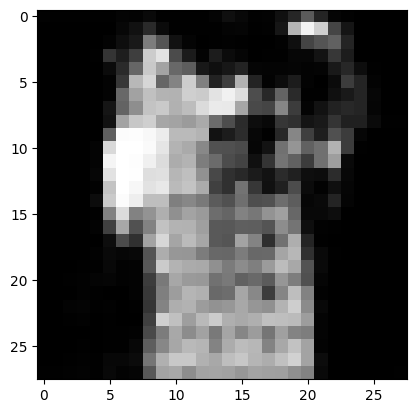

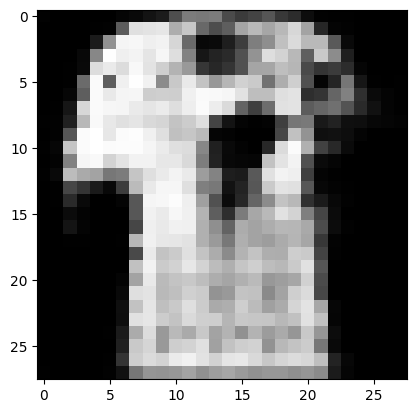

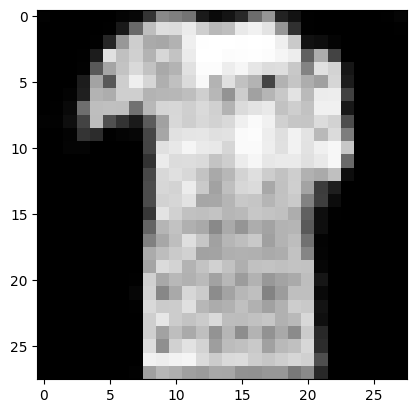

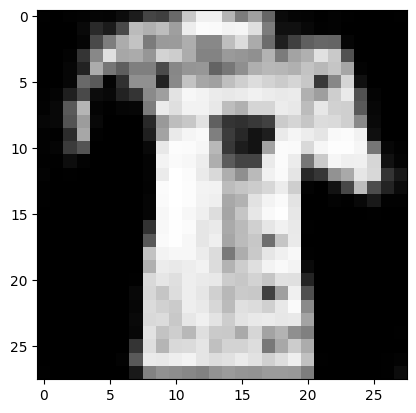

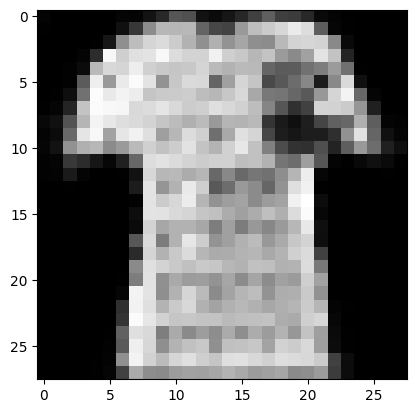

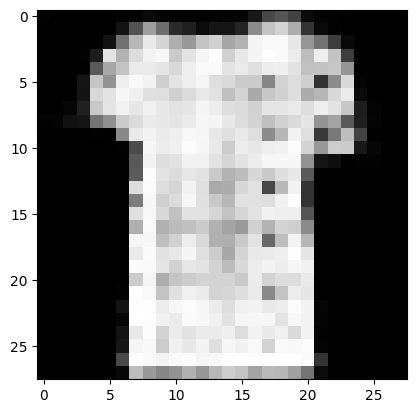

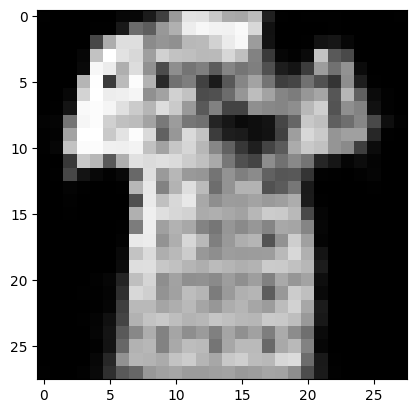

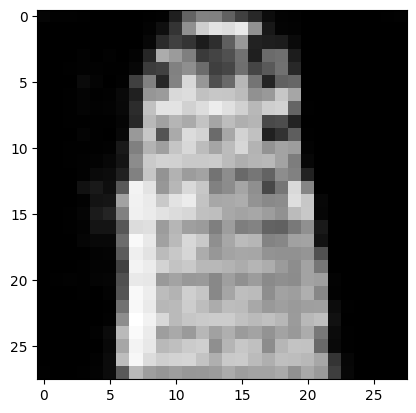

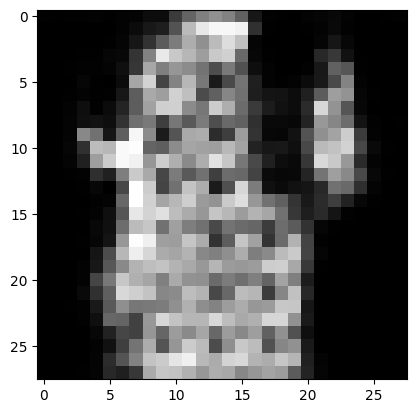

In [27]:
#Results after 20 epochs 

for image in images:

    plt.imshow(image.numpy().reshape(28,28),cmap='gray')

    plt.show()

In [28]:
GAN.save('gan.keras')

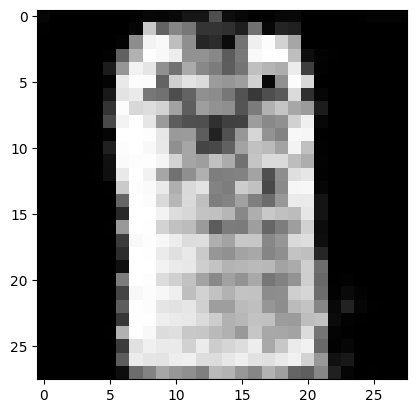

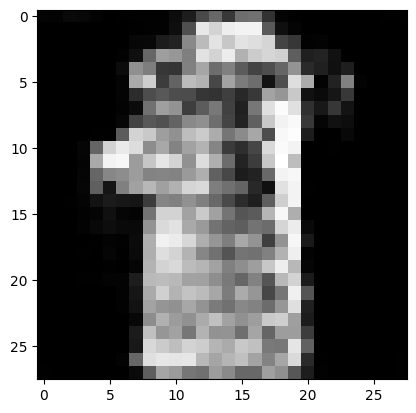

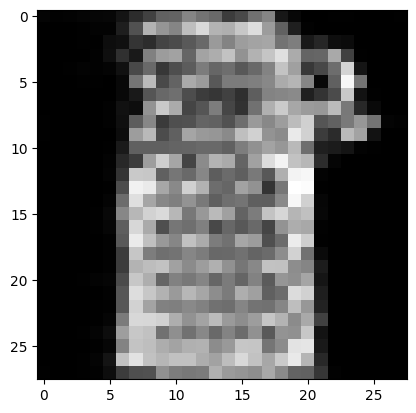

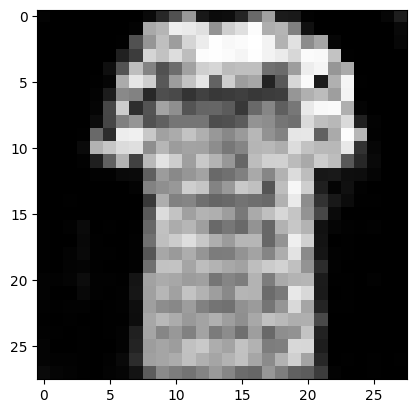

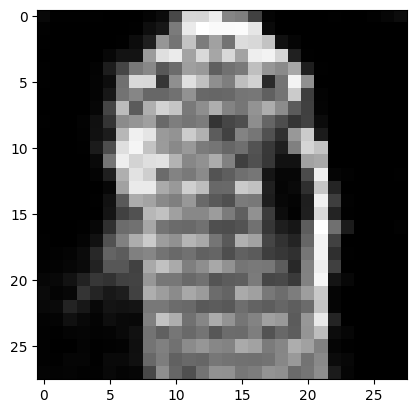

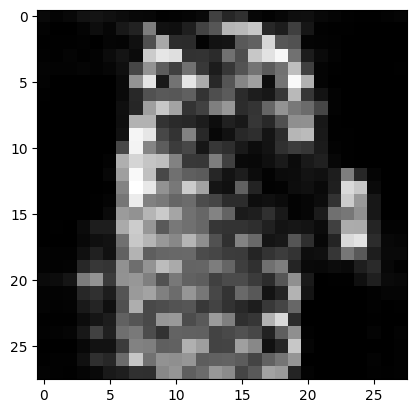

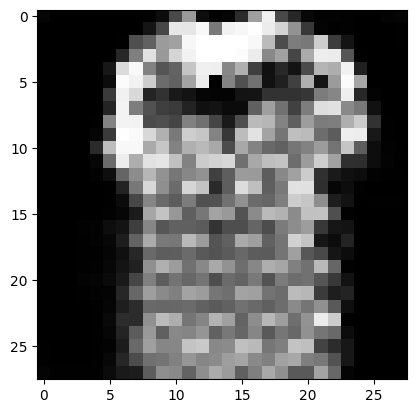

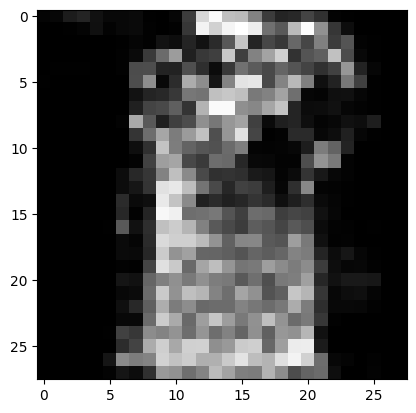

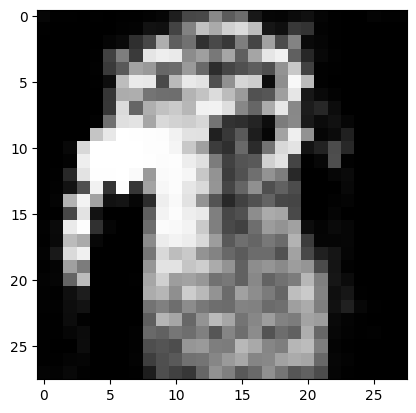

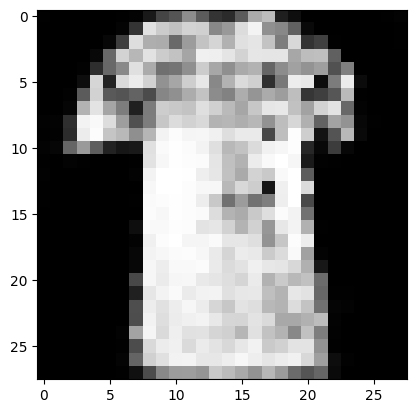

In [16]:
#Results after 30 epochs 

for image in images:

    plt.imshow(image.numpy().reshape(28,28),cmap='gray')

    plt.show()

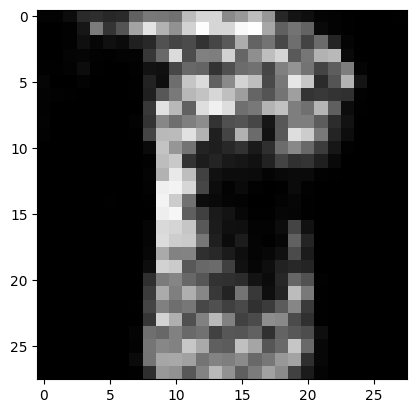

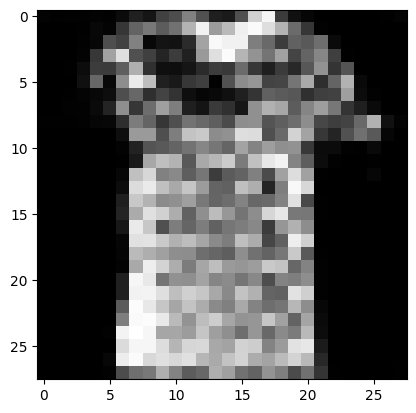

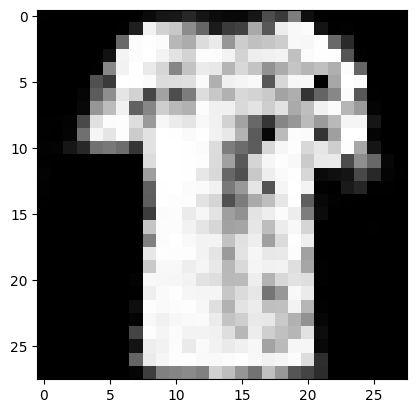

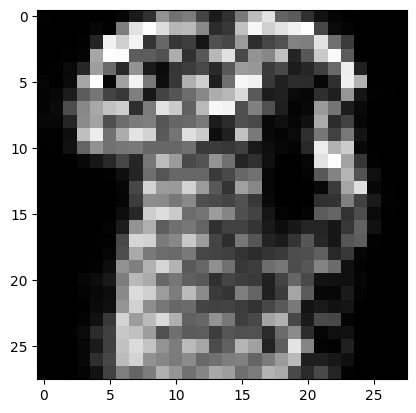

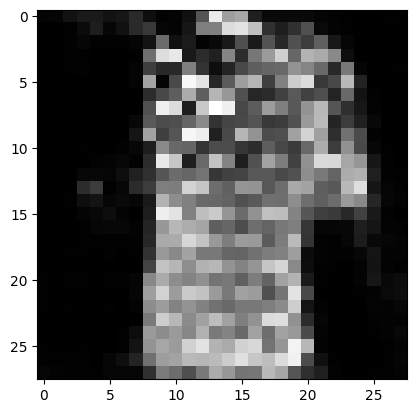

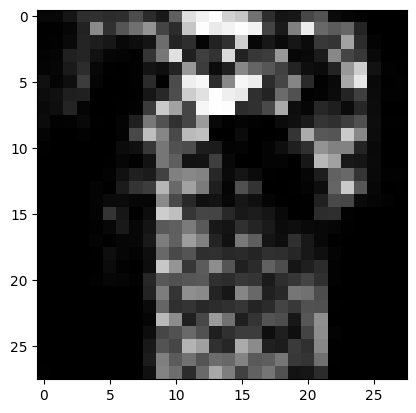

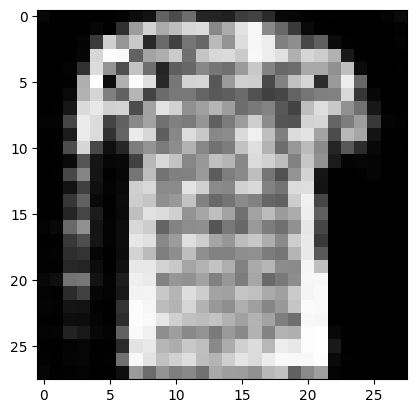

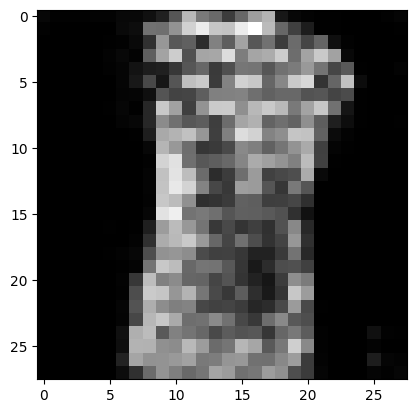

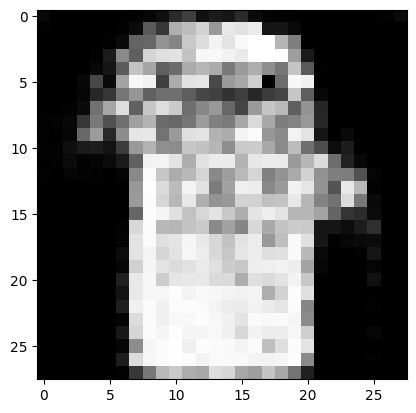

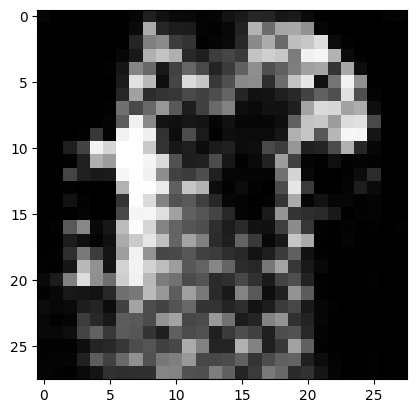

In [22]:
#Results after 40 epochs 

for image in images:

    plt.imshow(image.numpy().reshape(28,28),cmap='gray')

    plt.show()